<a href="https://colab.research.google.com/github/fatuunreal/komnum/blob/main/STUNTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://dinus.ac.id/wp-content/uploads/2024/11/Logo-Web-Udinus-Putih.png"  width="400">


# Komputasi Numerik - Teknik Informatika S1 - 29 Juni 2025
</center>

#By : FATU RAHMAT ~ A11.2022.14831

# Comparing Model Decision Tree dan Random Forest dalam Klasifikasi Stunting pada Anak

## BAB 1 - Mengumpulkan data



### Load Libary

In [387]:
# Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

### Load Dataset

In [388]:
# Load Dataset
df = pd.read_csv("Stunting_Dataset.csv")
df.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,female,56,2.9,50,11.0,90.0,Yes,No
1,female,20,3.3,49,11.1,80.5,No,No
2,male,4,2.8,48,6.5,63.0,No,No
3,female,14,2.0,49,7.0,71.0,Yes,No
4,male,32,3.2,49,11.0,88.7,Yes,No


In [389]:
# cek nama kolom
df.columns

Index(['Gender', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight',
       'Body Length', 'Breastfeeding', 'Stunting'],
      dtype='object')

Perhatikan nama kolom pada dataset. Gantilah nama-nama kolom yang masih berupa indeks (angka) dengan nama-nama fitur yang sesuai, yaitu: 'age', 'gender', 'tb', 'db', 'alkphos', 'sgpt', 'sgot', 'tp', 'alb', 'a/g ratio', dan 'selector'.

## BAB 2 – Menelaah data

### Mengecek Value

In [390]:
# Menampilkan data setelah nama kolom berhasil diganti. (5 kolom teratas)
df.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,female,56,2.9,50,11.0,90.0,Yes,No
1,female,20,3.3,49,11.1,80.5,No,No
2,male,4,2.8,48,6.5,63.0,No,No
3,female,14,2.0,49,7.0,71.0,Yes,No
4,male,32,3.2,49,11.0,88.7,Yes,No


- Pada tahap ini, kita akan menelaah data yang ada pada dataset `Liver Patient Dataset (ILPD)`. Kita akan melihat informasi data, statistik deskriptif, dan distribusi data.

In [391]:
# Menampilkan data setelah nama kolom berhasil diganti. (5 kolom terbawah)
df.tail()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
6495,male,53,2.9,49,15.0,96.0,No,Yes
6496,male,9,2.9,50,7.3,62.0,No,Yes
6497,female,20,1.8,48,7.3,73.0,Yes,Yes
6498,male,11,2.9,49,7.7,66.0,No,Yes
6499,female,14,2.9,49,6.5,66.0,No,Yes


### Melihat dimensi

In [392]:
df.shape

(6500, 8)

### Melihat informasi dataset

In [393]:
# Melihat Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         6500 non-null   object 
 1   Age            6500 non-null   int64  
 2   Birth Weight   6500 non-null   float64
 3   Birth Length   6500 non-null   int64  
 4   Body Weight    6500 non-null   float64
 5   Body Length    6500 non-null   float64
 6   Breastfeeding  6500 non-null   object 
 7   Stunting       6500 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 406.4+ KB


### Melihat deskripsi statistik

In [394]:
# Melihat Deskripsi statistik
df.describe()

,Age,Birth Weight,Birth Length,Body Weight,Body Length
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,25.222000,2.985092,49.136923,9.809769,79.389785
std,16.961179,0.349956,1.258554,3.459952,14.073021
min,1.000000,1.800000,42.000000,2.900000,53.000000
25%,11.000000,2.900000,49.000000,7.100000,68.900000
50%,20.000000,3.000000,49.000000,9.000000,77.000000
75%,39.000000,3.200000,50.000000,12.000000,92.000000
max,59.000000,4.000000,53.000000,24.500000,111.000000


### Melihat persebaran data

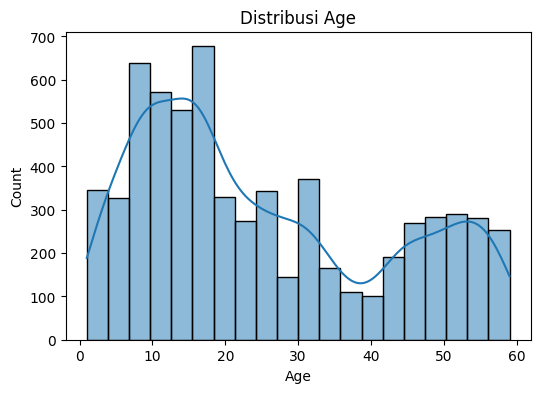

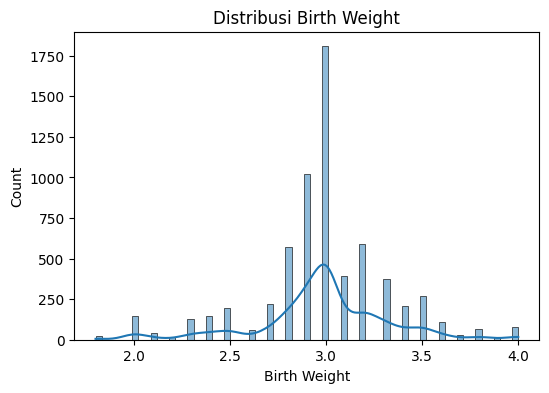

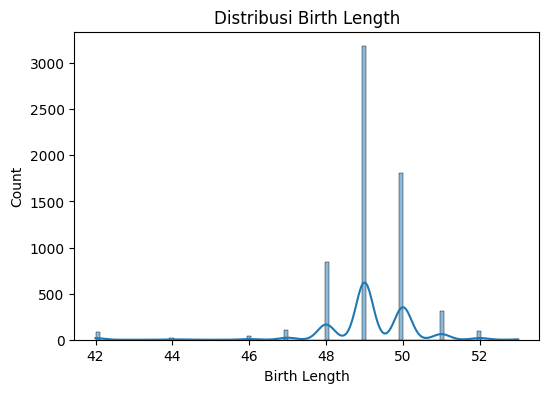

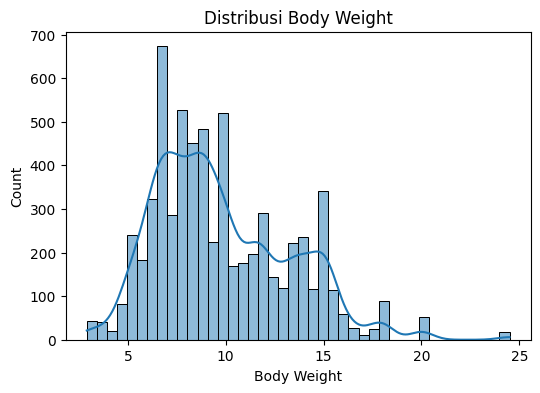

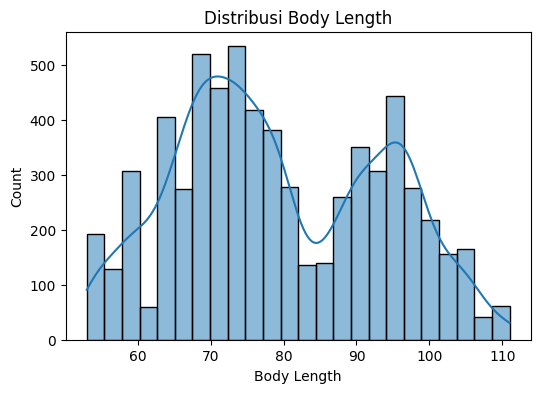

In [395]:
# menampilkan diagram histplot untuk telaah semua feature
for col in ['Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()


In [396]:
# membuat fungsi untuk melakukan observasi pada dataset
def grab_col_names(dataframe, cat_th = 10, car_th = 20): #  memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th).
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values).
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality).

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal.
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi: {dataframe.shape[0]}")
    print(f"Jumlah variabel: {dataframe.shape[1]}")
    print(f"Kolom kategorikal: {len(cat_cols)}")
    print(f"Kolom Numerik: {len(num_cols)}")
    print(f"Kategori tapi kardinal: {len(cat_but_car)}")
    print(f"Numerik tapi kategorikal: {len(num_but_cat)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car).
    return cat_cols, num_cols, cat_but_car

In [397]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Jumlah observasi: 6500
Jumlah variabel: 8
Kolom kategorikal: 3
Kolom Numerik: 5
Kategori tapi kardinal: 0
Numerik tapi kategorikal: 0


- Nominal Feature

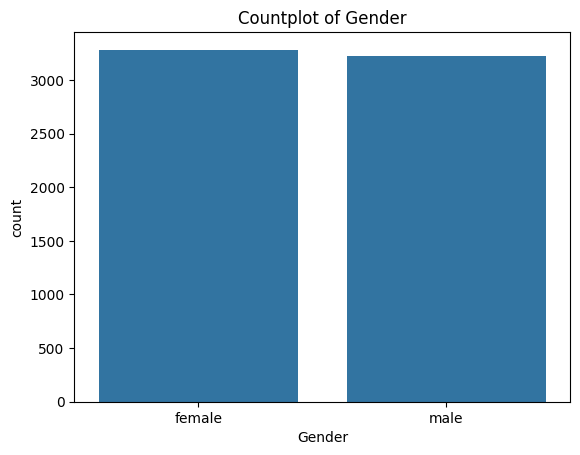

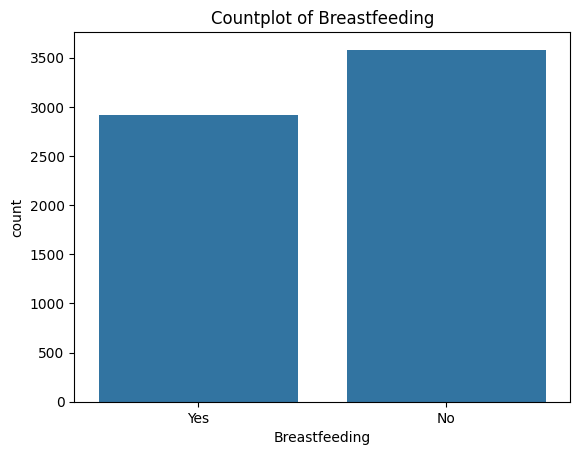

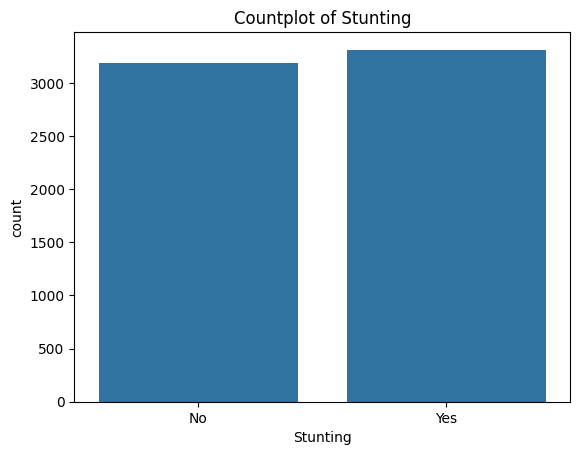

In [398]:
# Visualisasikan fitur nominal / kategorikal misal (menggunakan countplot)
for col in cat_cols:
    countplot = sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.show()

- Continous features

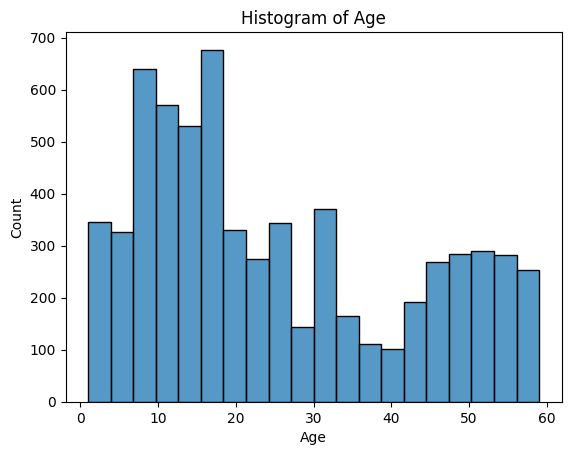

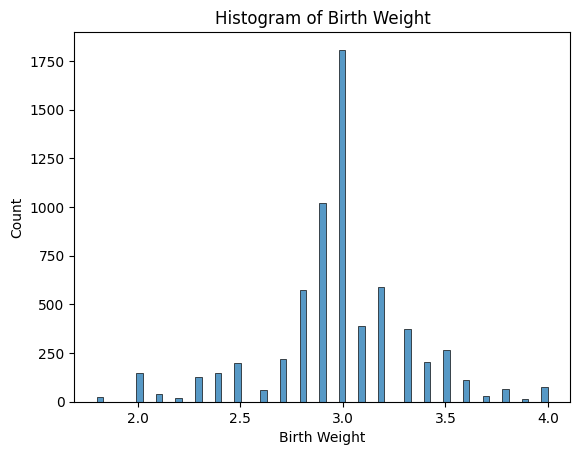

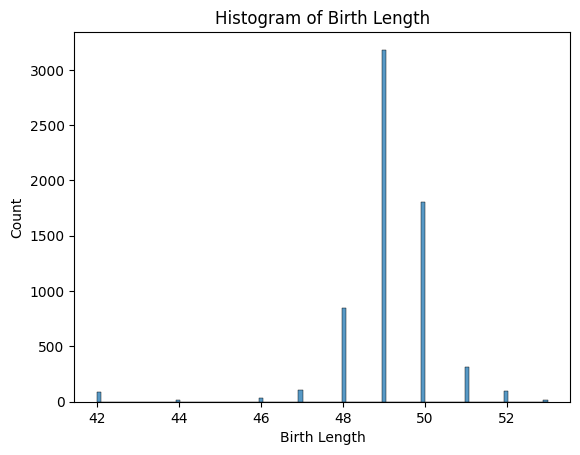

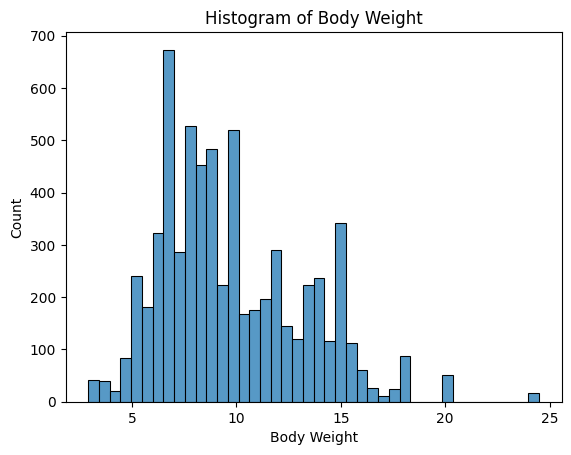

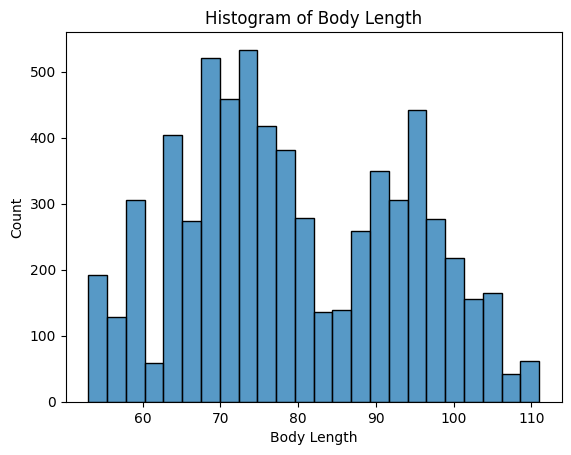

In [399]:
# Visualisasikan fitur numerik continous (misal : histplot)
for col in num_cols:
    histplot = sns.histplot(data=df, x=col)
    plt.title(f'Histogram of {col}')
    plt.show()

## BAB 3 – memvalidasi data

### Memeriksa nilai kosong (missing value)

In [400]:
# Melihat Nilai null / missing value
df.isnull().sum()

,0
Gender,0
Age,0
Birth Weight,0
Birth Length,0
Body Weight,0
Body Length,0
Breastfeeding,0
Stunting,0


### Memeriksa duplikat data

In [401]:
# Melihat Data duplikat
df.duplicated().sum()

np.int64(5525)

In [402]:
print("Duplikat:", df.duplicated().sum())

Duplikat: 5525


In [403]:

# Melihat Data duplikat
df.duplicated().sum()
df[df.duplicated(keep=False)]

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
1,female,20,3.3,49,11.1,80.5,No,No
2,male,4,2.8,48,6.5,63.0,No,No
4,male,32,3.2,49,11.0,88.7,Yes,No
6,male,2,2.9,49,8.5,74.2,Yes,No
7,male,33,2.5,49,10.0,91.5,No,Yes
...,...,...,...,...,...,...,...,...
6495,male,53,2.9,49,15.0,96.0,No,Yes
6496,male,9,2.9,50,7.3,62.0,No,Yes
6497,female,20,1.8,48,7.3,73.0,Yes,Yes
6498,male,11,2.9,49,7.7,66.0,No,Yes


### Memeriksa nilai unique

In [404]:
df.nunique()

,0
Gender,2
Age,59
Birth Weight,22
Birth Length,10
Body Weight,99
Body Length,146
Breastfeeding,2
Stunting,2


In [405]:
for col in df.columns:
 print(f'{col}')
 print(f'Jumlah nilai yang unik: {df[col].nunique()}')
 print(f'Nilai yang paling sering muncul (modus): {df[col].mode().values[0]}')
 print(f'{df[col].unique()}\n')

Gender
Jumlah nilai yang unik: 2
Nilai yang paling sering muncul (modus): female
['female' 'male']

Age
Jumlah nilai yang unik: 59
Nilai yang paling sering muncul (modus): 9
[56 20  4 14 32 30  2 33 15 16 47 31 25 12  3 55 19  7 35 46 13 37 17 10
  9 22 27 21 38 51 50 39  5  8 42 28 18 43 57 45 59 54 53 52  6 11 40  1
 49 23 36 48 29 58 24 34 44 41 26]

Birth Weight
Jumlah nilai yang unik: 22
Nilai yang paling sering muncul (modus): 3.0
[2.9 3.3 2.8 2.  3.2 2.3 2.5 3.  4.  2.4 2.6 2.7 3.6 3.4 3.1 3.7 3.5 3.8
 2.2 3.9 2.1 1.8]

Birth Length
Jumlah nilai yang unik: 10
Nilai yang paling sering muncul (modus): 49
[50 49 48 51 47 52 42 44 46 53]

Body Weight
Jumlah nilai yang unik: 99
Nilai yang paling sering muncul (modus): 9.0
[11.  11.1  6.5  7.  12.   8.5 10.  15.   5.9  6.6  9.1  9.8  5.8  8.2
  6.   7.7  9.   9.5  5.  10.7 13.1  6.7  7.1  7.6 13.   6.8 13.2  8.4
 11.8 13.8  4.6 16.6  7.3  9.6 15.2  4.2 13.5 12.5 14.3 11.5  8.  10.3
  4.9  6.3  7.2 18.   8.7 14.  14.5  6.2 15.5 14.4  5

In [406]:
# melihat apakah ada data yang tidak konsisten
df['Stunting'].value_counts()

,count
Stunting,
Yes,3312
No,3188


## BAB 4 – menentukan object data

In [407]:
# Melihat kembali informasi dataset untuk memahami isi dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         6500 non-null   object 
 1   Age            6500 non-null   int64  
 2   Birth Weight   6500 non-null   float64
 3   Birth Length   6500 non-null   int64  
 4   Body Weight    6500 non-null   float64
 5   Body Length    6500 non-null   float64
 6   Breastfeeding  6500 non-null   object 
 7   Stunting       6500 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 406.4+ KB


- Jika ada data yang tidak konsisten, silahkan di tangani pada proses dibawah ini.

### Mengubah label target

In [408]:
# Ubah label target menjadi 0 dan 1
df['Stunting'] = df['Stunting'].map({'No': 0, 'Yes': 1})

## BAB 5 – membersihkan data

### Memeriksa missing values

In [409]:
# Memastikan kembali untuk melihat data kosong
df.isnull().sum()

,0
Gender,0
Age,0
Birth Weight,0
Birth Length,0
Body Weight,0
Body Length,0
Breastfeeding,0
Stunting,0


### Handling duplikat data

In [410]:
# Cek duplikasi data & Handle jika terdapat duplikat data
df = df.drop_duplicates()

## BAB 6 – mengkonstruksi data


### Deteksi Outlier

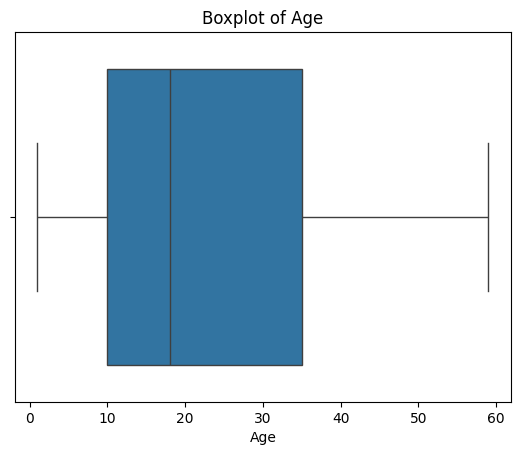

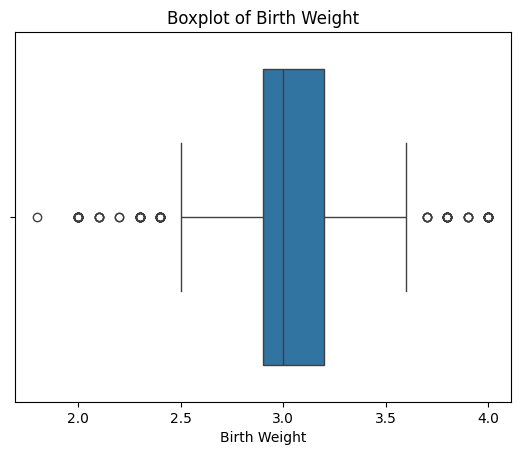

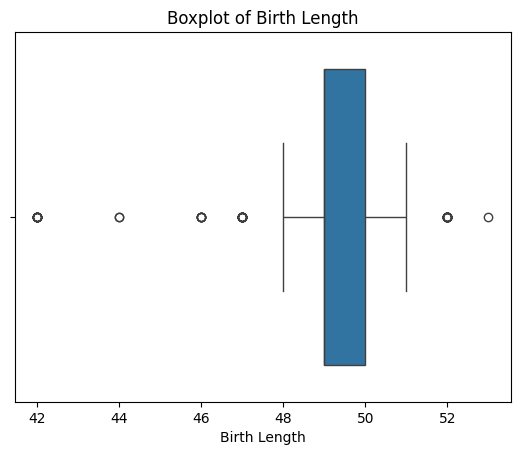

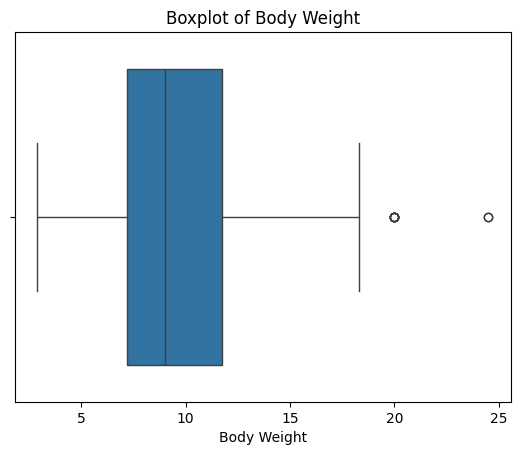

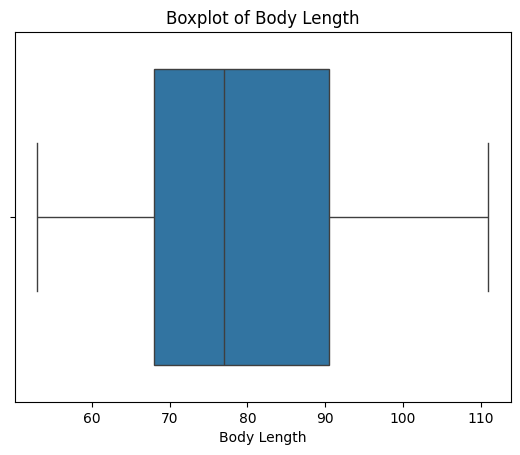

In [411]:
# cek outlier dengan visualisasi
for col in num_cols:
    boxplot = sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

#### Handling dengan IQR

Ingat, handling dengan IQR disini jika distribusi data tidak normal (tidak simetris atau skewed), dimana ada data yang outliersnya positively skewed (miring kanan/condong di kanan) atau negatively skewed (miring kiri/condong di kiri)



In [412]:
# Buat salinan dataframe
data_cleaned = df.copy()

In [413]:
iqr_cols = ['Birth Weight', 'Body Weight']

for col in iqr_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_cleaned[col] = data_cleaned[col].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )
    print(f"Kolom {col} telah diatasi outliersnya dengan IQR.")

Kolom Birth Weight telah diatasi outliersnya dengan IQR.
Kolom Body Weight telah diatasi outliersnya dengan IQR.


#### Handling dengan Zscore

In [414]:
zscore_cols = ['Birth Length']

for col in zscore_cols:
    mean = data_cleaned[col].mean()
    std = data_cleaned[col].std()
    threshold = 3  # z-score threshold

    data_cleaned[col] = data_cleaned[col].apply(
        lambda x: mean - threshold * std if (x - mean)/std < -threshold
        else (mean + threshold * std if (x - mean)/std > threshold else x)
    )
    print(f"Kolom {col} telah diatasi outliersnya dengan Z-score.")

Kolom Birth Length telah diatasi outliersnya dengan Z-score.


In [415]:
df = data_cleaned

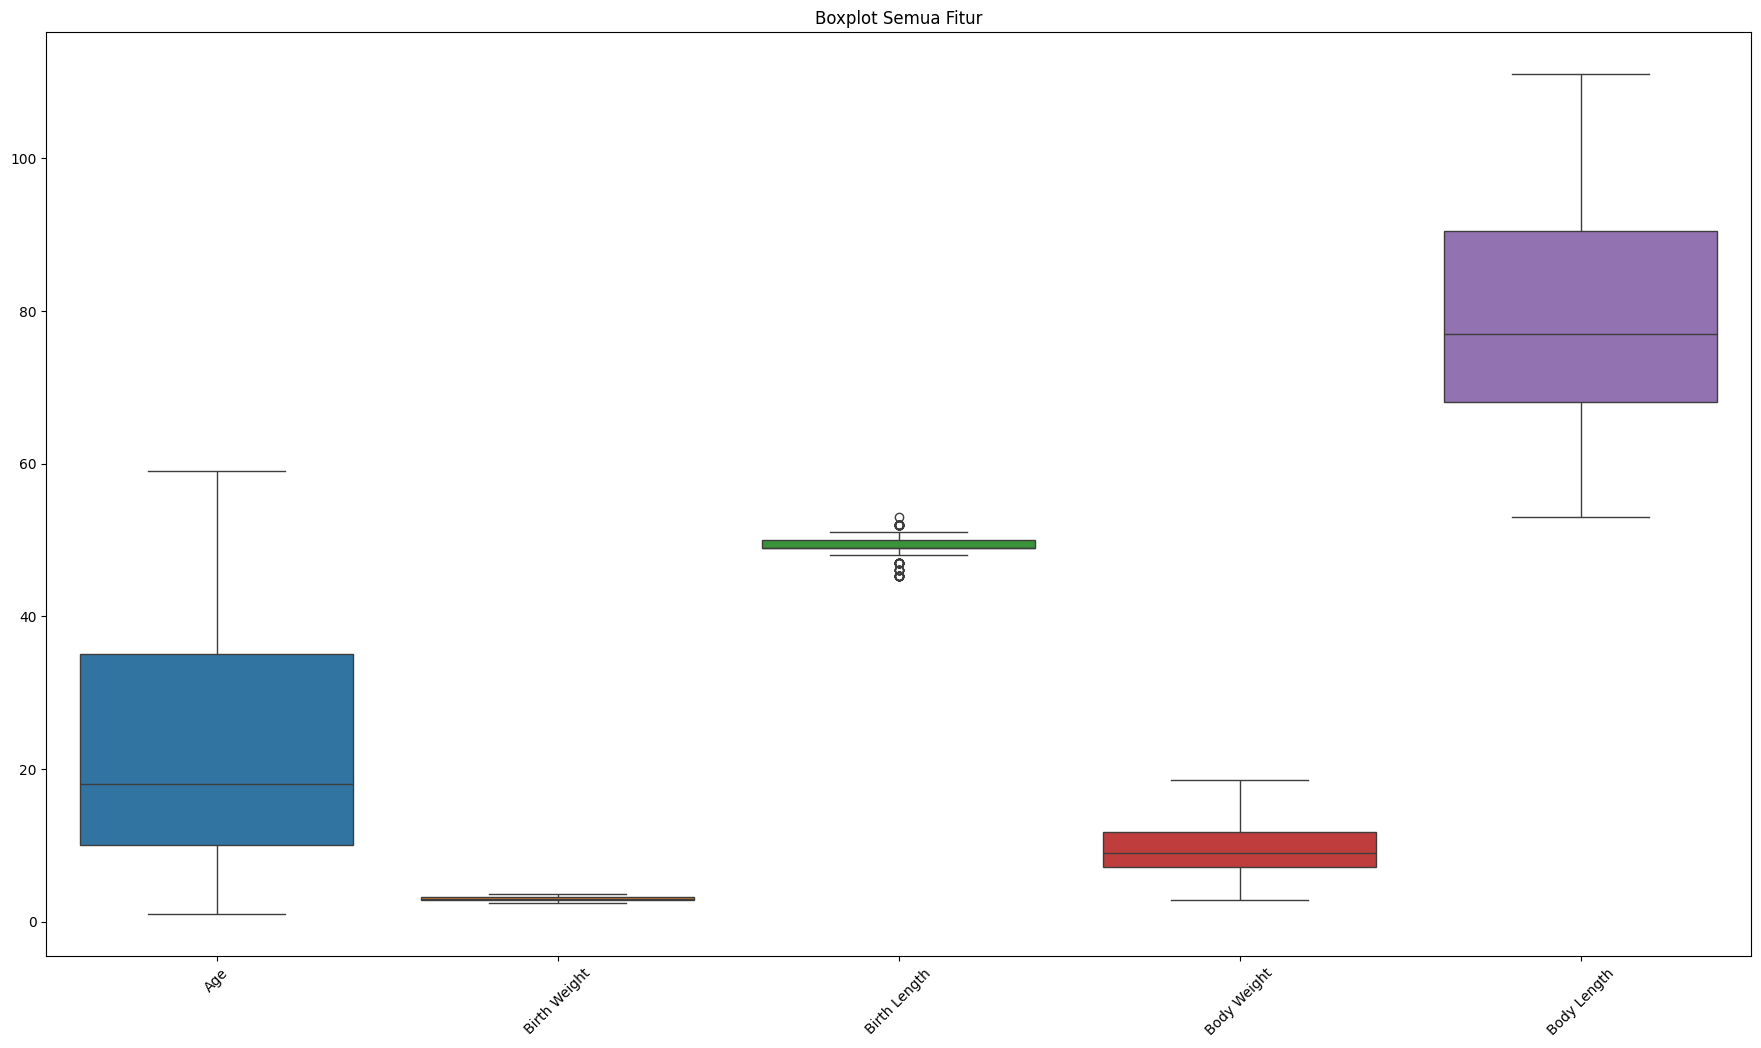

In [416]:
# cek outlier dengan visualisasi (misalnya menggunakan boxplot)
plt.figure(figsize=(22,12))
sns.boxplot(data=df.drop('Stunting', axis=1))
plt.xticks(rotation=45)
plt.title("Boxplot Semua Fitur")
plt.show()

### Mengubah kolom ke numerik

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 0 to 6487
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         975 non-null    object 
 1   Age            975 non-null    int64  
 2   Birth Weight   975 non-null    float64
 3   Birth Length   975 non-null    float64
 4   Body Weight    975 non-null    float64
 5   Body Length    975 non-null    float64
 6   Breastfeeding  975 non-null    object 
 7   Stunting       975 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 68.6+ KB


In [418]:
from sklearn.preprocessing import LabelEncoder

In [419]:
enc_cols = ['Gender', 'Breastfeeding']

In [420]:
for col in enc_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [421]:
df.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,0,56,2.90,50.0,11.0,90.0,1,0
1,0,20,3.30,49.0,11.1,80.5,0,0
2,1,4,2.80,48.0,6.5,63.0,0,0
3,0,14,2.45,49.0,7.0,71.0,1,0
4,1,32,3.20,49.0,11.0,88.7,1,0


### Heatmap Correlation

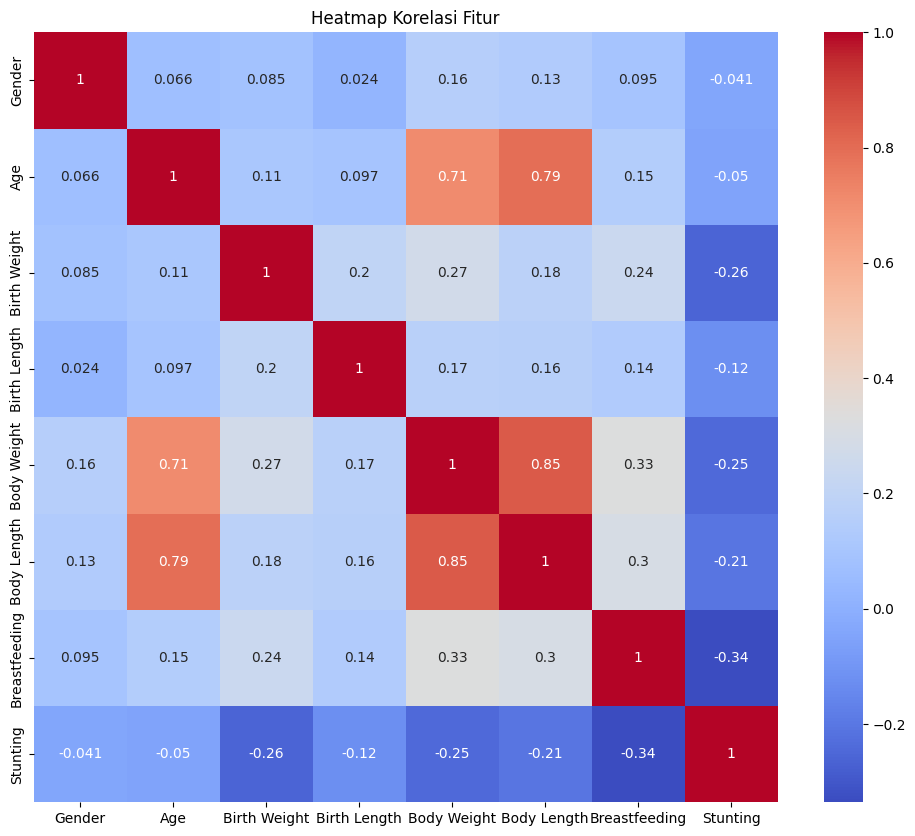

In [422]:
# melihat korelasi antar fitur (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

- PADA TAHAP SELANJUTNYA, SILAHKAN BANDINGKAN HASIL PEMODELAN KETIKA MENGGUNAKAN DATA YANG TELAH DIAUGMENTASI MENGGUNAKAN GAN DENGAN DATA YANG DIAUGMENTASI MENGGUNAKAN SMOTE.

- SETELAH ITU, JAWAB PERTANYAAN BERIKUT:
  - DARI RATA-RATA SEMUA MODEL YANG DIBANDINGKAN (RF, KNN, DAN LOGISTIC REGRESSION), AKURASI YANG DIDAPATKAN LEBIH TINGGI MENGGUNAKAN AUGMENTASI GAN ATAU SMOTE? : `ISI DI SINI`

## BAB 7 – menentukan label data

- yang menjadi target adalah: 'isi disini'
- yang menjadi fitur adalah : 'isi disini'

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 0 to 6487
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         975 non-null    int64  
 1   Age            975 non-null    int64  
 2   Birth Weight   975 non-null    float64
 3   Birth Length   975 non-null    float64
 4   Body Weight    975 non-null    float64
 5   Body Length    975 non-null    float64
 6   Breastfeeding  975 non-null    int64  
 7   Stunting       975 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 68.6 KB


### Splitting

#### Splitting untuk SMOTE

In [424]:
X_smote = df.drop('Stunting', axis=1)
y_smote = df['Stunting']

In [425]:
# Splitting data untuk SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, stratify=y_smote, test_size=0.2, random_state=42)

### Balancing data Imbalance

Distribusi kelas di train (original):
Stunting
1    405
0    375
Name: count, dtype: int64


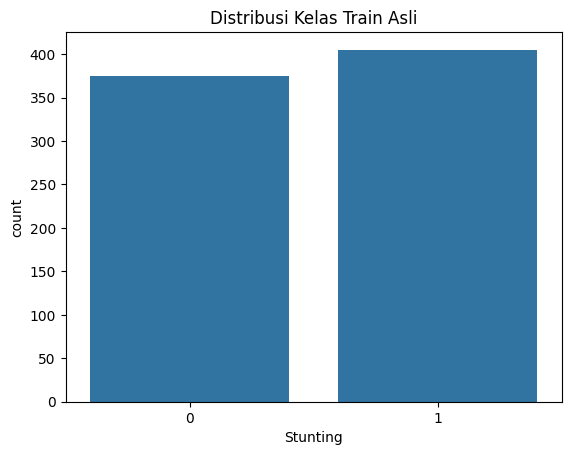

In [426]:
print("Distribusi kelas di train (original):")
print(y_train_smote.value_counts())
sns.countplot(x=y_train_smote)
plt.title("Distribusi Kelas Train Asli")
plt.show()

#### SMOTE

In [427]:
# karena jumlah kelas target tidak seimbang, kita akan melakukan resampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X_train_smote, y_train_smote)

Distribusi kelas setelah SMOTE:
Stunting
0    405
1    405
Name: count, dtype: int64


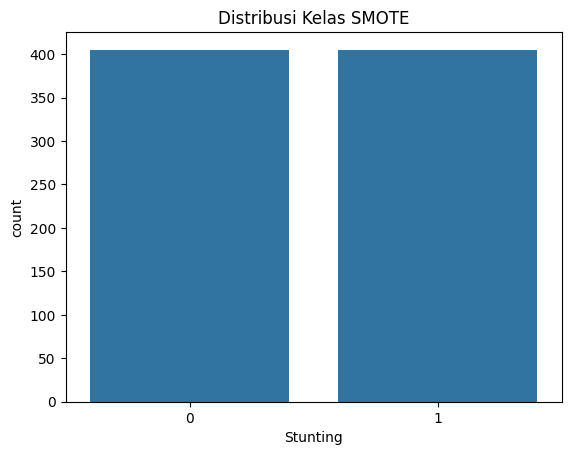

In [428]:
# Tampilkan visualisasi persebaran kelas setelah melalui proses sampling
print("Distribusi kelas setelah SMOTE:")
print(pd.Series(y_smote_resampled).value_counts())
sns.countplot(x=y_smote_resampled)
plt.title("Distribusi Kelas SMOTE")
plt.show()

### Normalisasi

- ANDA PERLU MELAKUKAN NORMALISASI DISINI

In [429]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler_smote = MinMaxScaler()
X_train_smote_scaled = scaler_smote.fit_transform(X_smote_resampled)
X_test_smote_scaled = scaler_smote.transform(X_test_smote)

- Dari pekerjaan Mengkonstruksi Data yang telah anda lakukan, bagaimana cara Anda menentukan fitur-fitur pada dataset anda perlu dinormalisasi atau tidak? : 'ISI DISINI'

## BAB 8 –  membangun model

In [430]:
def eval_model(model, X_train_data, y_train_data, X_test_data, y_test_data, model_name):
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    print(f"=== {model_name} ===")
    print(classification_report(y_test_data, y_pred))
    sns.heatmap(confusion_matrix(y_test_data, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### Decision Tree

Decision Tree
=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        94
           1       0.84      0.87      0.85       101

    accuracy                           0.85       195
   macro avg       0.85      0.85      0.85       195
weighted avg       0.85      0.85      0.85       195



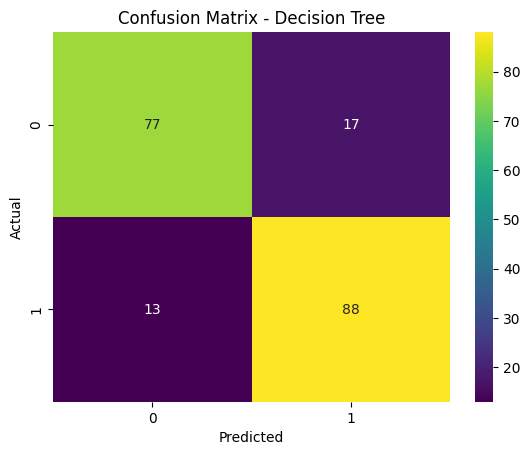

In [431]:
dt = DecisionTreeClassifier(random_state=42)

print("Decision Tree")
eval_model(dt, X_train_smote_scaled, y_smote_resampled, X_test_smote_scaled, y_test_smote, "Decision Tree")


Random Forest
=== Random Forest ===
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        94
           1       0.86      0.95      0.91       101

    accuracy                           0.90       195
   macro avg       0.90      0.90      0.90       195
weighted avg       0.90      0.90      0.90       195



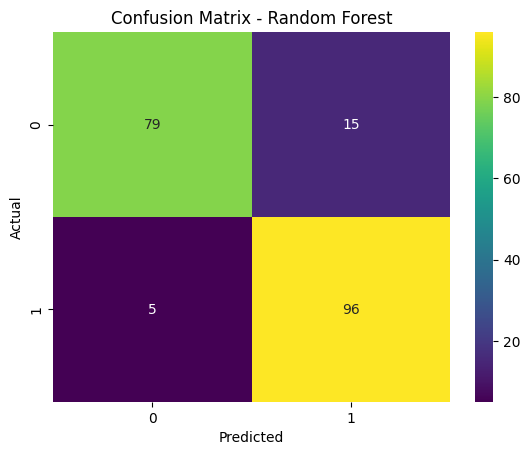

In [432]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

print("Random Forest")
eval_model(rf, X_train_smote_scaled, y_smote_resampled, X_test_smote_scaled, y_test_smote, "Random Forest")

## BAB 9 – mengevaluasi hasil pemodelan

In [433]:
# Inisialisasi model dasar
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# SMOTE
dt.fit(X_train_smote_scaled, y_smote_resampled)
dt_smote_acc = accuracy_score(y_test_smote, dt.predict(X_test_smote_scaled))

rf.fit(X_train_smote_scaled, y_smote_resampled)
rf_smote_acc = accuracy_score(y_test_smote, rf.predict(X_test_smote_scaled))

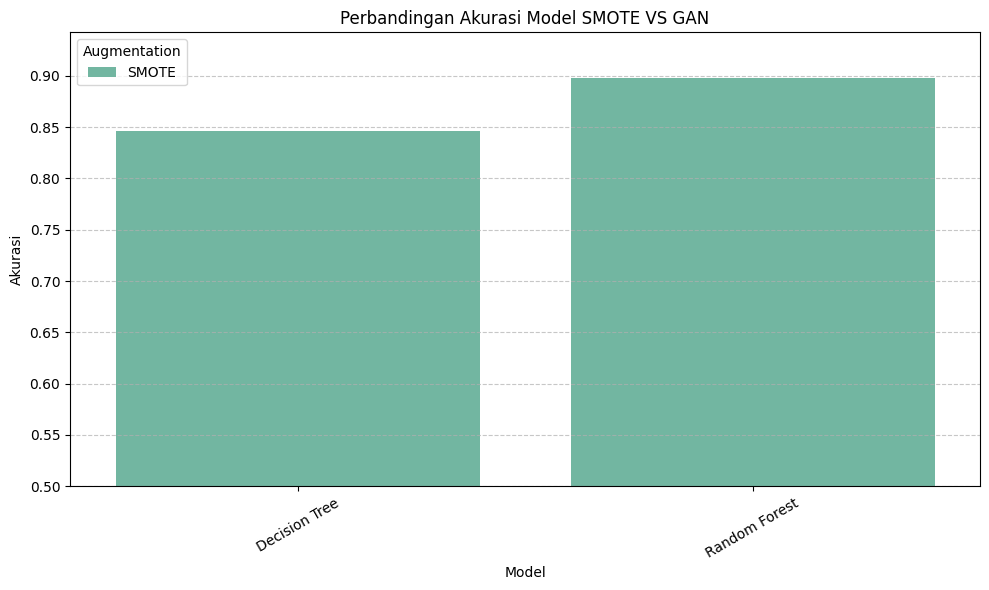

In [434]:
# Nama model
model_names = [
   'Decision Tree', 'Random Forest'
]

# Akurasi dari semua model
accuracies = [
    dt_smote_acc, rf_smote_acc
]

# Buat DataFrame untuk plotting
df_result = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Augmentation': ['SMOTE'] * 2
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Augmentation', data=df_result, palette='Set2')
plt.title("Perbandingan Akurasi Model SMOTE VS GAN")
plt.ylabel("Akurasi")
plt.xlabel("Model")
plt.ylim(0.5)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [435]:
# Misalnya model Random Forest-mu bernama rf_model
import pickle

with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Kalau kamu pakai MinMaxScaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler_smote, f)


In [436]:
with open("random_forest_model.pkl", "rb") as f:
    model = pickle.load(f)
print(type(model))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
